# Contents
1. Imports
2. Checks
3. Orders
4. Spending
5. Prices
6. Products
7. Profiling
8. Demographics

# 1. Imports

In [4]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [6]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))

# 2. Checks

In [7]:
#Dimensions
df.shape

(32403719, 44)

In [8]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Overview

## 3.1. Product Level - Inventory

In [9]:
# View descriptive statistics
df_max_prices = df.groupby('product_id')['prices'].max().reset_index()
df_max_prices['prices'].describe()

count    49657.000000
mean         7.680421
std          4.199349
min          1.000000
25%          4.100000
50%          7.100000
75%         11.100000
max         25.000000
Name: prices, dtype: float64

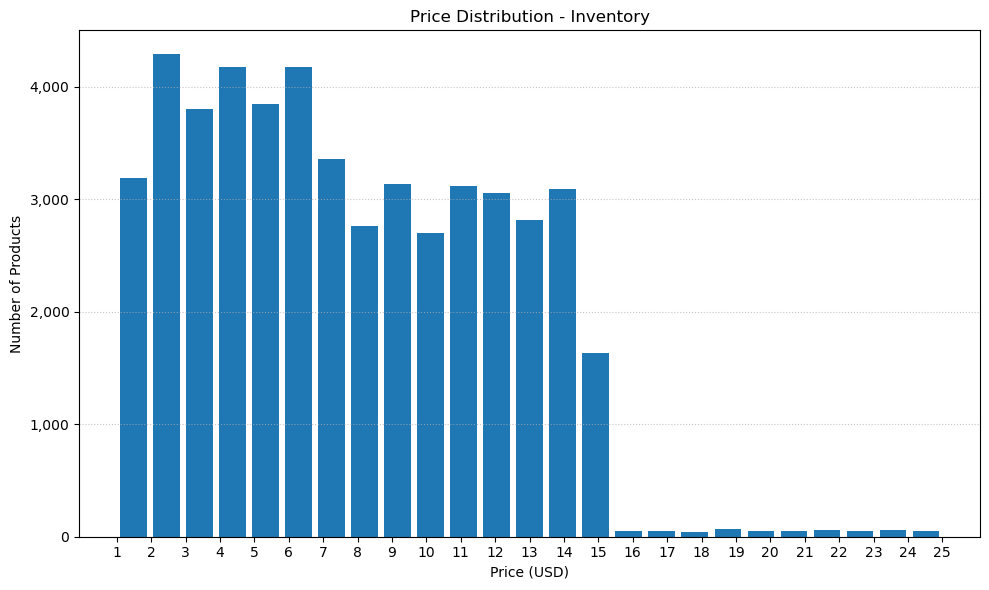

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.1_price_dist_inv.png


In [10]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_max_prices['prices'], bins=25, rwidth=0.8)

# Labels and title
plt.title('Price Distribution - Inventory')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')

# Adjust x-axis so that ticks are centered in each bin
bins = np.arange(df['prices'].min() - 0.5, df['prices'].max() + 1.5, 1)  # Ensure bins cover full range
tick_positions = (bins[:-1] + bins[1:]) / 2  # Middle of each bin
plt.xticks(tick_positions, rotation=0)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.1_price_dist_inv.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

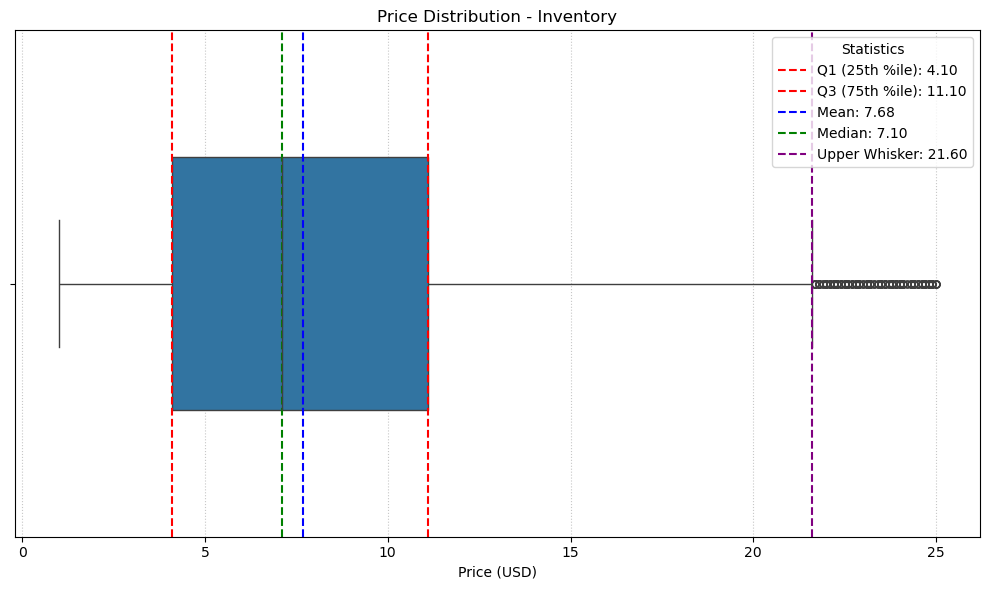

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.1_price_dist_inv_box.png


In [11]:
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_max_prices['prices'], width=0.5, fliersize=5, linewidth=1)

# Set title and labels
plt.title('Price Distribution - Inventory')
plt.xlabel('Price (USD)')

# Calculate key statistics
q1 = np.percentile(df_max_prices['prices'], 25)
q3 = np.percentile(df_max_prices['prices'], 75)
median = np.median(df_max_prices['prices'])
mean = np.mean(df_max_prices['prices'])
iqr = q3 - q1

# Define outlier thresholds
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Identify outliers
outliers = df_max_prices[(df_max_prices['prices'] < lower_whisker) | (df_max_prices['prices'] > upper_whisker)]['prices']

# Add annotations for IQR, mean, and outliers
plt.axvline(q1, color='red', linestyle='dashed', label=f'Q1 (25th %ile): {q1:.2f}')
plt.axvline(q3, color='red', linestyle='dashed', label=f'Q3 (75th %ile): {q3:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(upper_whisker, color='purple', linestyle='dashed', label=f'Upper Whisker: {upper_whisker:.2f}')

# Format x-axis with thousands separator
plt.ticklabel_format(style='plain', axis='x')

# Add gridlines
plt.grid(axis='x', linestyle='dotted', alpha=0.7)

# Show legend
plt.legend(title='Statistics')

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.1_price_dist_inv_box.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Order Level - Sales (All)

In [12]:
# Count the number of products ordered for each unique price
df['prices'].value_counts(dropna=False).sort_index()

prices
1.0     115143
1.1     242782
1.2     256258
1.3     425691
1.4     392209
         ...  
24.6      1962
24.7      7283
24.8       410
24.9      5781
25.0     13772
Name: count, Length: 241, dtype: int64

In [13]:
# View descriptive statistics
df['prices'].describe()

count    3.240372e+07
mean     7.792048e+00
std      4.242308e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

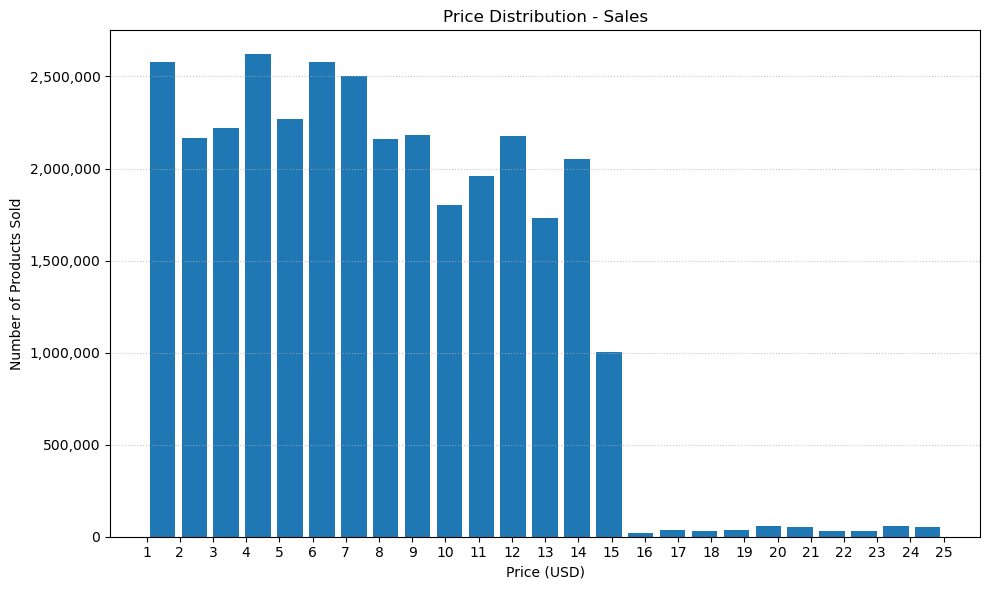

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.2_price_dist_sales.png


In [14]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['prices'], bins=25, rwidth=0.8)

# Set title and axis labels
plt.title('Price Distribution - Sales')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products Sold')

# Adjust x-axis so that ticks are centered in each bin
bins = np.arange(df['prices'].min() - 0.5, df['prices'].max() + 1.5, 1)
tick_positions = (bins[:-1] + bins[1:]) / 2  # Middle of each bin
plt.xticks(tick_positions, rotation=0)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.2_price_dist_sales.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

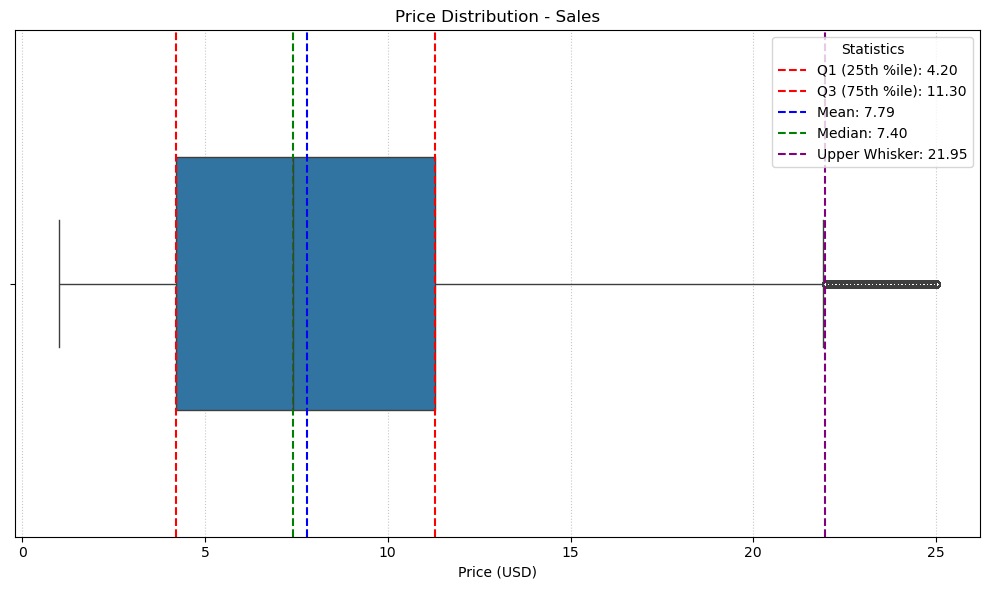

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.2_price_dist_sales_box.png


In [15]:
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['prices'], width=0.5, fliersize=5, linewidth=1)

# Set title and labels
plt.title('Price Distribution - Sales')
plt.xlabel('Price (USD)')

# Calculate key statistics
q1 = np.percentile(df['prices'], 25)
q3 = np.percentile(df['prices'], 75)
median = np.median(df['prices'])
mean = np.mean(df['prices'])
iqr = q3 - q1

# Define outlier thresholds
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['prices'] < lower_whisker) | (df['prices'] > upper_whisker)]['prices']

# Add annotations for IQR, mean, and outliers
plt.axvline(q1, color='red', linestyle='dashed', label=f'Q1 (25th %ile): {q1:.2f}')
plt.axvline(q3, color='red', linestyle='dashed', label=f'Q3 (75th %ile): {q3:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(upper_whisker, color='purple', linestyle='dashed', label=f'Upper Whisker: {upper_whisker:.2f}')

# Format x-axis with thousands separator
plt.ticklabel_format(style='plain', axis='x')

# Add gridlines
plt.grid(axis='x', linestyle='dotted', alpha=0.7)

# Show legend
plt.legend(title='Statistics')

# Improve layout for readability
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.2_price_dist_sales_box.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.3. Day of Week

In [16]:
# Create a cross-tabulation
price_days = pd.crosstab(df['order_day_of_week'], df['price_label'])
price_days

price_label,Low Price,Mid Price,High Price,Premium Price
order_day_of_week,,,,
Monday,1069107,2126710,967258,50615
Tuesday,972952,1940769,880877,45820
Wednesday,960306,1908565,869692,45143
Thursday,1066011,2119925,968103,51612
Friday,1107707,2275231,1049981,63397
Saturday,1524854,3144384,1447810,86850
Sunday,1435112,2853481,1302333,69114


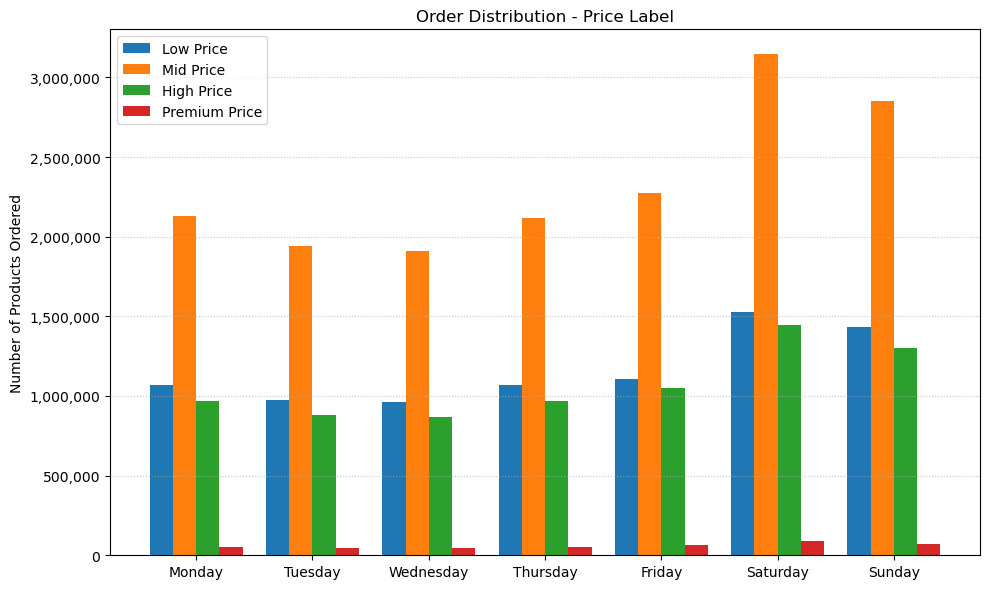

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.3_price_dist_dow.png


In [17]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(price_days.index))

# Plot each category as a separate bar (grouped format)
for i, days in enumerate(price_days.columns):
    plt.bar(
        x + i * bar_width, 
        price_days[days], 
        width=bar_width, 
        label=days
    )
# Formatting
plt.title('Order Distribution - Price Label')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(price_days.columns) - 1) / 2), price_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.3_price_dist_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.4. Hour of Day

In [18]:
# Create a cross-tabulation
price_hours = pd.crosstab(df['order_hour_of_day'], df['price_label'])
price_hours

price_label,Low Price,Mid Price,High Price,Premium Price
order_hour_of_day,,,,
0,54585,110892,50534,2752
1,28718,58801,26780,1399
2,17411,35104,15948,910
3,12586,26299,11762,634
4,13320,26804,12430,686
5,21869,44353,20685,1050
6,72348,146653,67793,3697
7,221998,449986,207578,11464
8,431551,867262,397577,21692


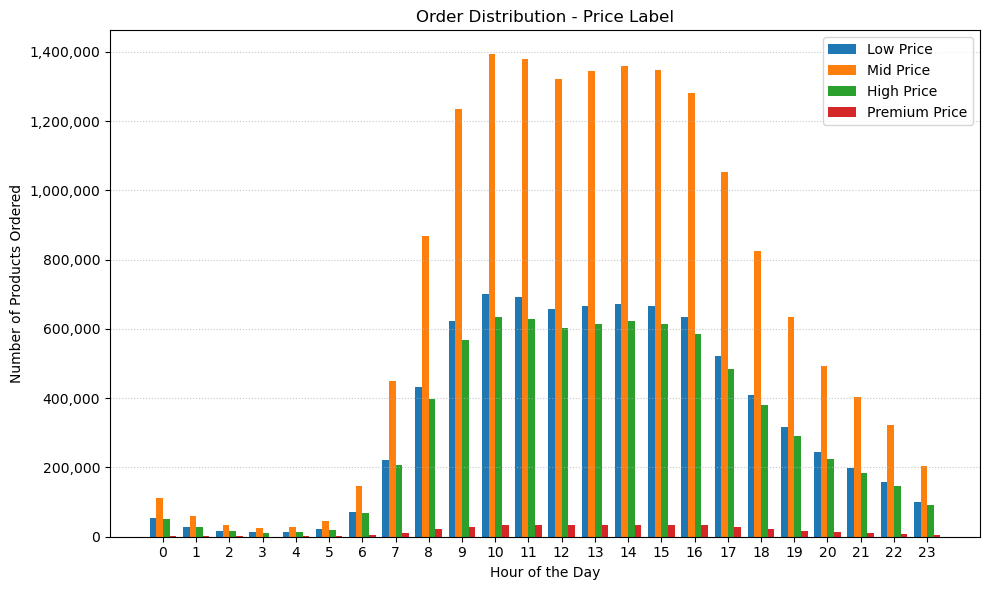

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.4_price_dist_hod.png


In [19]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(price_hours.index))

# Plot each category as a separate bar (grouped format)
for i, hours in enumerate(price_hours.columns):
    plt.bar(
        x + i * bar_width, 
        price_hours[hours], 
        width=bar_width, 
        label=hours
    )

# Set the title and labels
plt.title('Order Distribution - Price Label')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(price_hours.columns) - 1) / 2), price_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.4_price_dist_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.5. Department

In [20]:
# Create a cross-tabulation
orders_departmets_counts = df['department'].value_counts().sort_values(ascending=False)
prices_department = pd.crosstab(df['department'], df['price_label'])
prices_department = prices_department.loc[orders_departmets_counts.index]
prices_department

price_label,Low Price,Mid Price,High Price,Premium Price
department,,,,
produce,2122669,4933000,2423622,0
dairy eggs,1174548,2554449,1669188,0
snacks,1448832,1438718,0,0
beverages,727619,1295240,665256,0
frozen,523282,1208380,503081,0
pantry,444894,934870,495377,228
bakery,226364,704114,241950,0
canned goods,194372,664203,209483,0
deli,269756,551950,229543,0


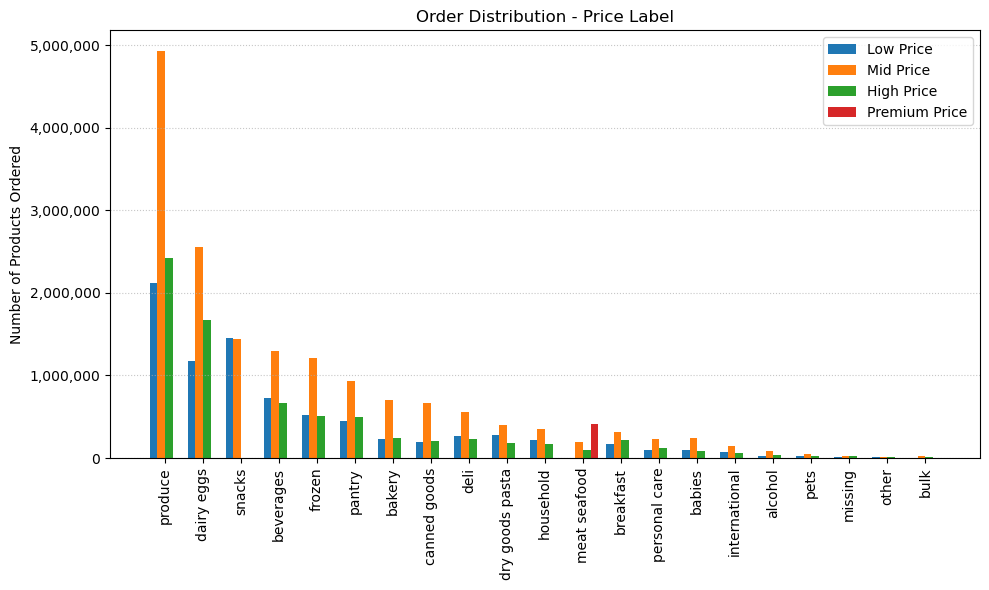

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.5_price_dist_department.png


In [21]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(prices_department.index))

# Plot each category as a separate bar (grouped format)
for i, department in enumerate(prices_department.columns):
    plt.bar(
        x + i * bar_width, 
        prices_department[department], 
        width=bar_width, 
        label=department
    )

# Set the title and labels
plt.title('Order Distribution - Price Label')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(prices_department.columns) - 1) / 2), prices_department.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.5_price_dist_department.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.6. Product Cagegory

In [22]:
# Create a cross-tabulation
orders_categories_counts = df['product_category'].value_counts().sort_values(ascending=False)
prices_categories = pd.crosstab(df['product_category'], df['price_label'])
prices_categories = prices_categories.loc[orders_categories_counts.index]
prices_categories

price_label,Low Price,Mid Price,High Price,Premium Price
product_category,,,,
perishables,3793337,8937510,4666910,412323
non-perishables,3063678,4986722,1619325,228
beverages,727619,1295240,665256,0
household,212539,356349,169778,0
personal care,100357,227633,119020,0
babies,92421,244014,87359,0
miscellaneous,94567,186917,93205,0
alcoholic beverages,27293,86982,39421,0
pets,24238,47698,25780,0


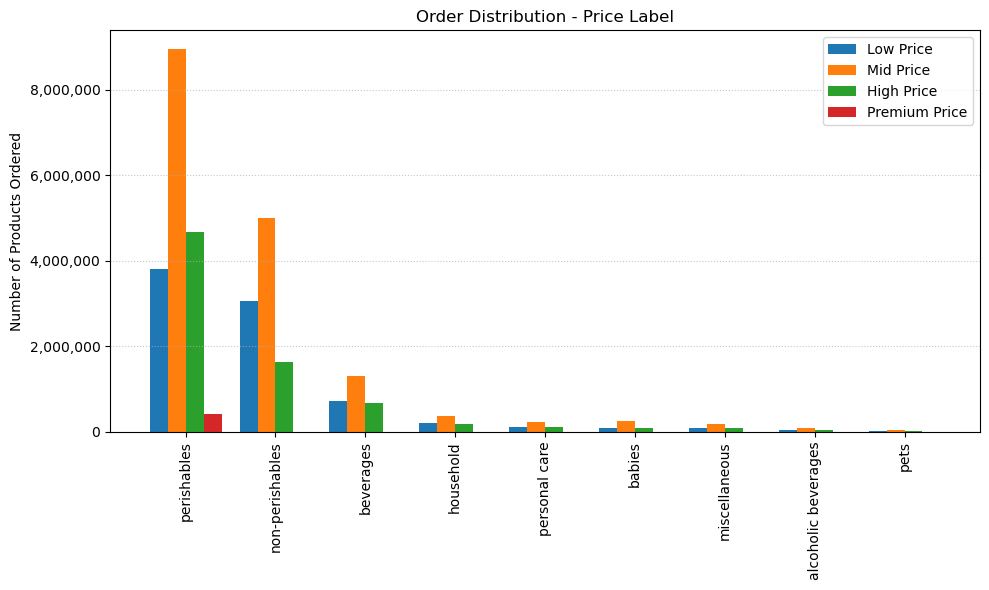

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Prices/3.6_price_dist_category.png


In [23]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(prices_categories.index))

# Plot each category as a separate bar (grouped format)
for i, categories in enumerate(prices_categories.columns):
    plt.bar(
        x + i * bar_width, 
        prices_categories[categories], 
        width=bar_width, 
        label=categories
    )

# Set the title and labels
plt.title('Order Distribution - Price Label')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(prices_categories.columns) - 1) / 2), prices_categories.index, rotation=90)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Prices', '3.6_price_dist_category.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")